In [27]:
import cv2
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



In [28]:
pip install pyfiglet  

Note: you may need to restart the kernel to use updated packages.


In [29]:
from pyfiglet import Figlet
f = Figlet(font='slant')
print(f.renderText('AHMED YOUSEFF'))

    ___    __  ____  _____________ 
   /   |  / / / /  |/  / ____/ __ \
  / /| | / /_/ / /|_/ / __/ / / / /
 / ___ |/ __  / /  / / /___/ /_/ / 
/_/  |_/_/ /_/_/  /_/_____/_____/  
                                   
__  ______  __  _______ __________________
\ \/ / __ \/ / / / ___// ____/ ____/ ____/
 \  / / / / / / /\__ \/ __/ / /_  / /_    
 / / /_/ / /_/ /___/ / /___/ __/ / __/    
/_/\____/\____//____/_____/_/   /_/       
                                          



In [30]:
IMG_DIM = 128

def imread(img_path):
    img = cv2.imread(img_path)
    img = img.astype('float32')/255.0
    img = cv2.resize(img, (IMG_DIM, IMG_DIM))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def imshow(img, figsize=(5, 5)):
    plt.figure(figsize=figsize)
    plt.imshow(img, cmap='gray')
    plt.show()

In [31]:
pwd

'd:\\datascince\\xray'

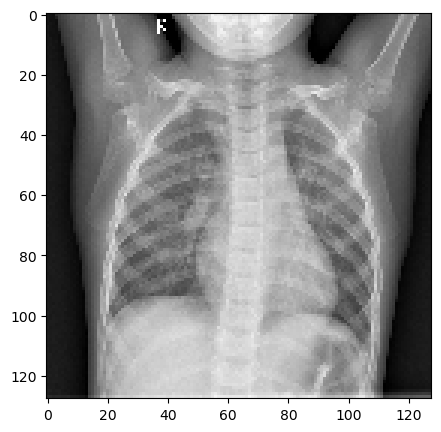

(128, 128, 3)

In [32]:
img_path = 'chest_xray/train/normal/IM-0115-0001.jpeg'
img = imread(img_path)
imshow(img)
img.shape

In [33]:
def create_dataframe(data_path):
    class_dict = {
        'normal': 0,
        'opacity': 1
    }
    image_paths = []
    image_outputs = []
    for c, output in class_dict.items():
        folder_path = os.path.join(data_path, c)
        for f in os.listdir(folder_path):
            f_path = os.path.join(folder_path, f)
            image_paths.append(f_path)
            image_outputs.append(output)
    df = pd.DataFrame({
        'path': image_paths,
        'output': image_outputs
    })
    return df

In [34]:
DATA_PATH = 'chest_xray/'
train_df = create_dataframe(os.path.join(DATA_PATH, 'train'))
test_df = create_dataframe(os.path.join(DATA_PATH, 'test'))

In [35]:
train_df

,path,output
0,chest_xray/train\normal\IM-0001-0001.jpeg,0
1,chest_xray/train\normal\IM-0003-0001.jpeg,0
2,chest_xray/train\normal\IM-0005-0001.jpeg,0
3,chest_xray/train\normal\IM-0007-0001.jpeg,0
4,chest_xray/train\normal\IM-0009-0001.jpeg,0
...,...,...
5698,chest_xray/train\opacity\person99_virus_183.jpeg,1
5699,chest_xray/train\opacity\person9_bacteria_38.jpeg,1
5700,chest_xray/train\opacity\person9_bacteria_39.jpeg,1
5701,chest_xray/train\opacity\person9_bacteria_40.jpeg,1


In [36]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(train_df, test_size=0.33, random_state=0)

In [37]:
# X.shape = (n_images, img_height, img_width, channels)
# X.shape = (n_images, IMG_DIM, IMG_DIM, 3)

def read_images(img_paths):
    img_paths = list(img_paths)
    n = len(img_paths)
    X = np.zeros((n, IMG_DIM, IMG_DIM, 3), dtype='float32')
    for i in tqdm(range(n)):
        path = img_paths[i]
        img = imread(path)
        X[i] = img
    return X

In [38]:
X_train = read_images(train_df['path'])
X_val = read_images(val_df['path'])
X_test = read_images(test_df['path'])

y_train = train_df['output']
y_val = val_df['output']
y_test = test_df['output']

100%|██████████| 879/879 [00:37<00:00, 23.51it/s]


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten,Dropout,GlobalAvgPool2D


In [40]:
model = Sequential()
model.add(Conv2D(16,3, activation='relu', input_shape=X_train[0].shape))
model.add(MaxPool2D(2))
model.add(Conv2D(32, 3, activation='relu'))
model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPool2D(2))
model.add(GlobalAvgPool2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
MODEL_PATH = 'saved-bst/xray182-best'

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 conv2d_6 (Conv2D)           (None, 59, 59, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 29, 29, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 27, 27, 64)       

In [41]:
'''
model = Sequential()
model.add(Conv2D(32, 3, activation='relu', input_shape=X_train[0].shape))
model.add(MaxPool2D(2))
model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.7))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
'''

"\nmodel = Sequential()\nmodel.add(Conv2D(32, 3, activation='relu', input_shape=X_train[0].shape))\nmodel.add(MaxPool2D(2))\nmodel.add(Conv2D(32, 3, activation='relu'))\nmodel.add(MaxPool2D(2))\nmodel.add(Conv2D(64, 3, activation='relu'))\nmodel.add(MaxPool2D(2))\nmodel.add(Flatten())\nmodel.add(Dense(128, activation='relu'))\nmodel.add(Dense(256,activation='relu'))\nmodel.add(Dropout(0.7))\n\nmodel.add(Dense(1, activation='sigmoid'))\nmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])\nmodel.summary()\n"

In [42]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(MODEL_PATH,
                            save_weights_only=True,
                            save_best_only=True,
                            verbose=1)
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=16,
    batch_size=32,
    callbacks=[checkpoint],
)

Epoch 1/16
119/120 [============================>.] - ETA: 0s - loss: 0.5940 - accuracy: 0.7274
Epoch 1: val_loss improved from inf to 0.57563, saving model to saved-bst\xray182-best
120/120 [==============================] - 4s 28ms/step - loss: 0.5944 - accuracy: 0.7270 - val_loss: 0.5756 - val_accuracy: 0.7285
Epoch 2/16
117/120 [============================>.] - ETA: 0s - loss: 0.5237 - accuracy: 0.7593
Epoch 2: val_loss improved from 0.57563 to 0.40360, saving model to saved-bst\xray182-best
120/120 [==============================] - 3s 25ms/step - loss: 0.5215 - accuracy: 0.7624 - val_loss: 0.4036 - val_accuracy: 0.8257
Epoch 3/16
120/120 [==============================] - ETA: 0s - loss: 0.3384 - accuracy: 0.8414
Epoch 3: val_loss did not improve from 0.40360
120/120 [==============================] - 2s 20ms/step - loss: 0.3384 - accuracy: 0.8414 - val_loss: 0.4165 - val_accuracy: 0.8055
Epoch 4/16
119/120 [============================>.] - ETA: 0s - loss: 0.3194 - accuracy: 0.

In [49]:
hist_df = pd.DataFrame(history.history)


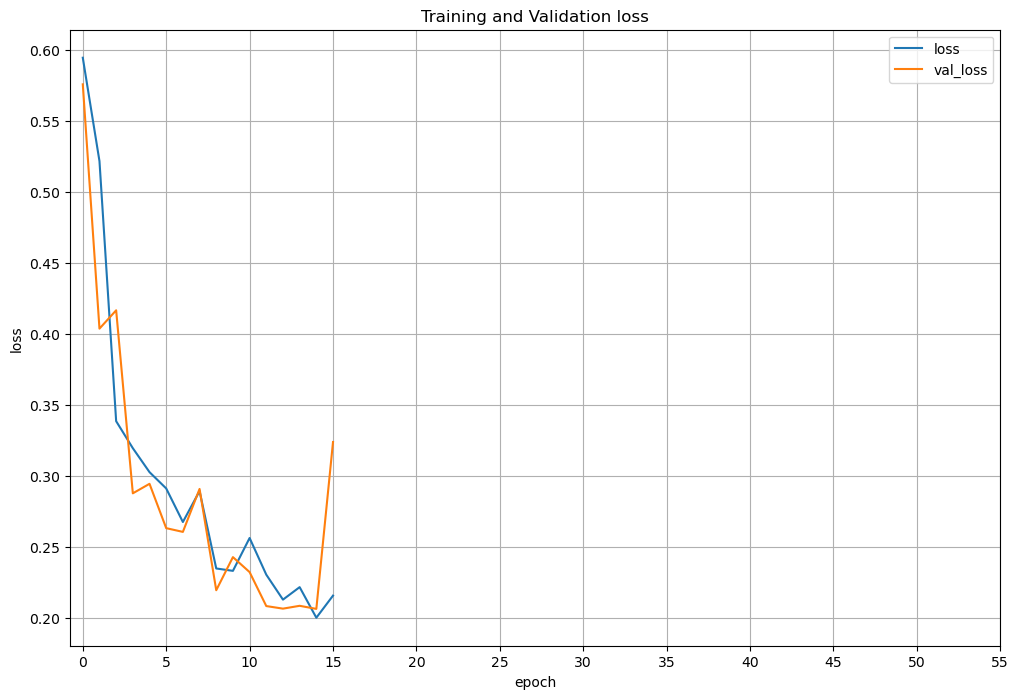

In [44]:
hist_df.plot(y=['loss', 'val_loss'], figsize=(12, 8))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.grid(axis='both')
plt.xticks(np.arange(0, 60, 5))
plt.show()

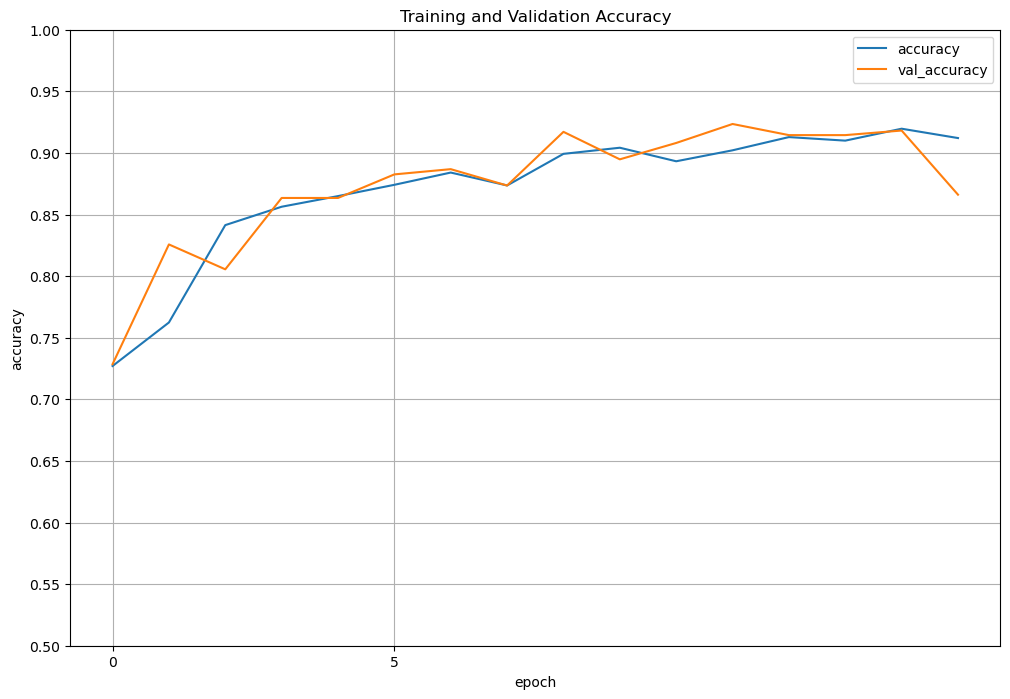

In [50]:
hist_df.plot(y=['accuracy', 'val_accuracy'], figsize=(12, 8))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy')
plt.grid(axis='both')
plt.xticks(np.arange(0, 10, 5))
plt.yticks(np.arange(0.5, 1.01, 0.05))
plt.show()

In [51]:
model.load_weights(MODEL_PATH)

In [52]:
model.evaluate(X_test, y_test)

28/28 [==============================] - 0s 9ms/step - loss: 0.4334 - accuracy: 0.8385


[0.43338534235954285, 0.8384528160095215]

In [53]:
img = imread('chest_xray/test/opacity/person127_bacteria_603.jpeg')
img = np.expand_dims(img, 0)
y = model.predict(img)[0][0]
print(y)
if y > 0.5:
    print('opacity')
else:
    print('normal')

1/1 [==============================] - 0s 43ms/step
0.9994023
opacity
